# Problem 4

### a) Random input, compare variance

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
n = 100
m = 10
k_values = np.arange(15, 26)
mc_runs = 1000
k2_ests = {k: [] for k in k_values}
k4_ests = {k: [] for k in k_values}

for k in k_values:
    for run in range(mc_runs):
        line = np.zeros(n)
        line[:k] = 1 # put in k faulty items

        np.random.shuffle(line) # randomize order (same for both methods)


        # METHOD 2

        k2_est = 0
        for item in line:
            num = random.random()
            if num < 1/m: # check with probability 1/m
                k2_est += item   # +item acts as indicator variable instead of actually checking

        k2_est = k2_est * m # scale up by m to get estimate of total number of 1s
        k2_ests[k].append(k2_est)

        #print(f"k2 estimate for k={k}: {k2_ests[k][-1]}")



        # METHOD 4

        k4_est = 0
        blocks = line.reshape(-1, m) # reshape the line into blocks of size m
        for block in blocks:
            choice = random.choice(block) # choose one item from the block at random
            k4_est += choice # again acts as indicator variable

        k4_est = k4_est * m # scale up by m to get estimate of total number of 1s
        k4_ests[k].append(k4_est)

        #print(f"k4 estimate for k={k}: {k4_ests[k][-1]}")

In [3]:
k2_vars = [np.var(k2_ests[k], ddof=1) for k in k_values]
k4_vars = [np.var(k4_ests[k], ddof=1) for k in k_values]

k2_std_errs = [np.std(k2_ests[k], ddof=1) / np.sqrt(mc_runs) for k in k_values]
k4_std_errs = [np.std(k4_ests[k], ddof=1) / np.sqrt(mc_runs) for k in k_values]

k2_ci = 1.96 * np.array(k2_std_errs)
k4_ci = 1.96 * np.array(k4_std_errs)

### ** Claude did all this plotting **

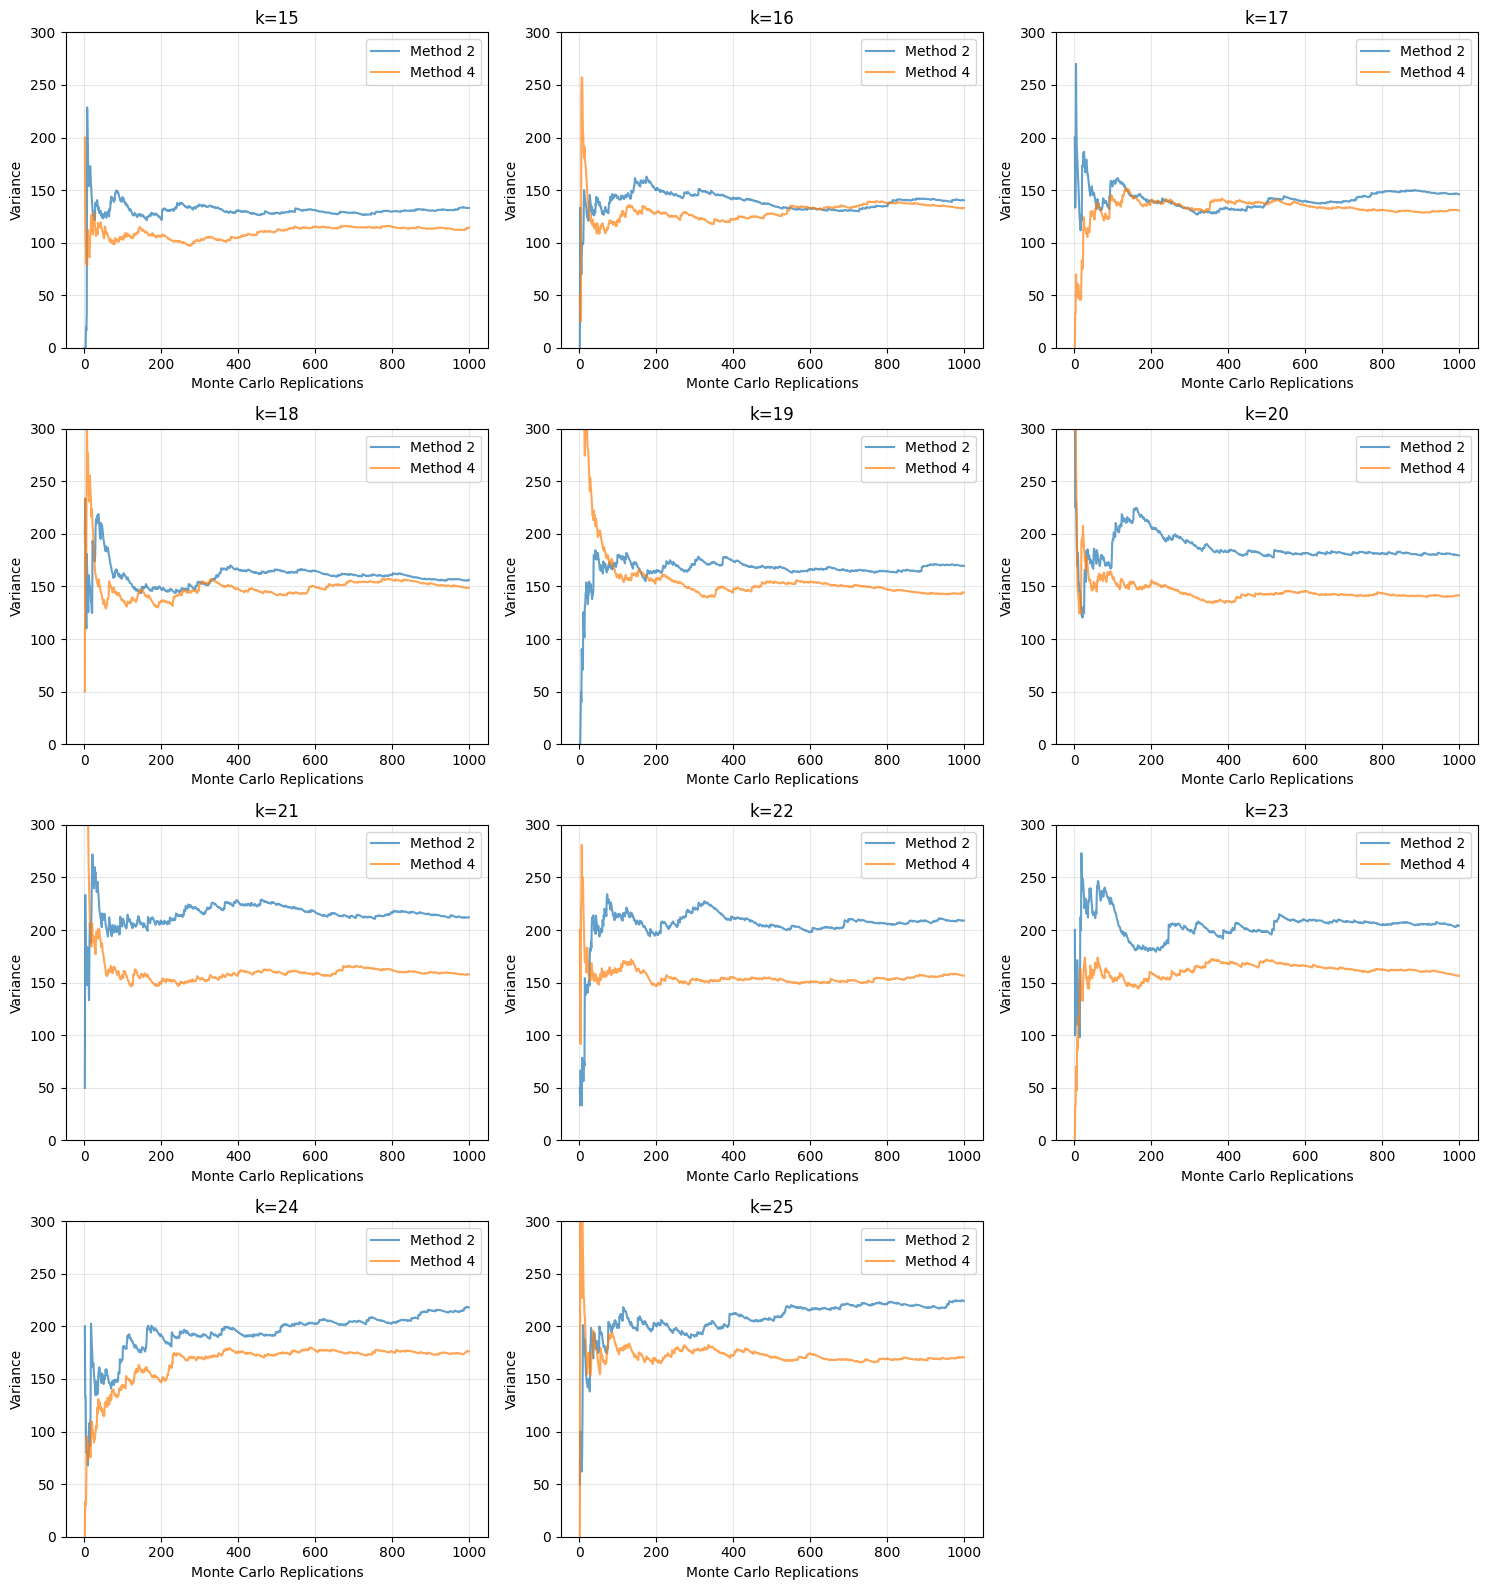

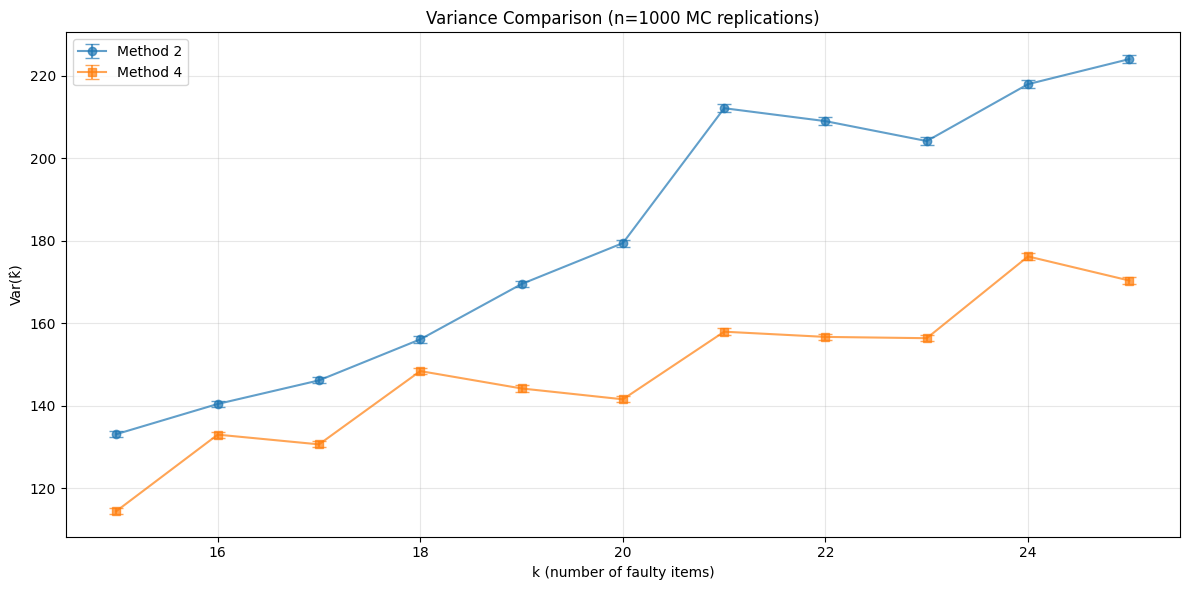


Variance Comparison:
k     Var(k̂₂)     Var(k̂₄)     Ratio (Var₂/Var₄)
--------------------------------------------------
15    133.10       114.44       1.16        
16    140.41       132.97       1.06        
17    146.13       130.61       1.12        
18    156.08       148.38       1.05        
19    169.50       144.17       1.18        
20    179.42       141.54       1.27        
21    212.12       157.93       1.34        
22    208.98       156.67       1.33        
23    204.16       156.36       1.31        
24    217.95       176.18       1.24        
25    224.03       170.33       1.32        


In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    mc_reps = np.arange(2, mc_runs + 1) # start from 2 to avoid variance of a single estimate being zero (same below)
    
    # Cumulative variance estimates
    k2_cum_var = [np.var(k2_ests[k][:i], ddof=1) for i in range(2, mc_runs + 1)]
    k4_cum_var = [np.var(k4_ests[k][:i], ddof=1) for i in range(2, mc_runs + 1)]
    
    ax.plot(mc_reps, k2_cum_var, label='Method 2', alpha=0.7)
    ax.plot(mc_reps, k4_cum_var, label='Method 4', alpha=0.7)
    ax.set_title(f'k={k}')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Variance')
    ax.set_ylim(0, 300)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide the last subplot (we only have 11 values of k)
axes[11].axis('off')

plt.tight_layout()
plt.show()

# PLOT 2: Single plot with confidence intervals
plt.figure(figsize=(12, 6))

plt.errorbar(k_values, k2_vars, yerr=k2_ci, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=6)
plt.errorbar(k_values, k4_vars, yerr=k4_ci, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=6)

plt.xlabel('k (number of faulty items)')
plt.ylabel('Var(k̂)')
plt.title(f'Variance Comparison (n={mc_runs} MC replications)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nVariance Comparison:")
print(f"{'k':<5} {'Var(k̂₂)':<12} {'Var(k̂₄)':<12} {'Ratio (Var₂/Var₄)':<12}")
print("-" * 50)
for i, k in enumerate(k_values):
    ratio = k2_vars[i] / k4_vars[i] if k4_vars[i] > 0 else float('inf')
    print(f"{k:<5} {k2_vars[i]:<12.2f} {k4_vars[i]:<12.2f} {ratio:<12.2f}")

### b) Worst case, compare variance

In [ ]:
K = 20
l_values = [2, 4, 5, 10, 20]

k2_ests_b = {l: [] for l in l_values}
k4_ests_b = {l: [] for l in l_values}

for l in l_values:
    for run in range(mc_runs):
        line = np.zeros(n)
        # figure out blocks